# Regressor de Sentimiento en ESP v1

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

import os, sys
jiazz = os.path.abspath(os.path.join('..'))
print(jiazz)
if jiazz not in sys.path:
    sys.path.append(jiazz)
sys.path

/app


['',
 '/usr/local/lib/python36.zip',
 '/usr/local/lib/python3.6',
 '/usr/local/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/IPython/extensions',
 '/root/.ipython',
 '/app']

In [29]:
from wordcloud import WordCloud, STOPWORDS

def generate_cloudword(pd, image_dims=(800, 400)):
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    W, H = image_dims
    stopwords = set(STOPWORDS)
    data = pd

    wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=250,
      max_font_size=40,
      width=W, height=H,
      random_state=777
     ).generate(str(data['sample_value']))

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

### Create Load Function

In [30]:
from pandas import read_csv, DataFrame
from sklearn.utils import shuffle
from slugify import slugify


def load(filename):
    df = read_csv('../data/%s.csv' % filename)
    return shuffle(df)

In [31]:
df = load('trainer_datasets_samples_aws')
df.head()



sample_value sample_tag_gender  \
1112  @danielurresti1 un payasete más en la contiend...                 m   
560   @politica_ecpe @columbusopina @enriquecornejor...                 m   
443   @danielurresti1 decidofobia? como asesinas a n...                 m   
563   @danielurresti1 castañeda jr .... punteando.. ...                 m   
221   @danielurresti1 urresti nadando a contra corri...                 m   

      sample_float_intvoto sample_tag_emotion sample_tag_narrativa  \
1112                  -0.1            neutral           comentario   
560                   -0.8                mad              opinion   
443                   -0.3                mad              opinion   
563                   -0.1               glad              opinion   
221                   -0.7            neutral              opinion   

      sample_float_sentiment  sample_float_sarcasmo sample_tag_age  \
1112                     0.3                    0.0          mas25   
560                      0.2                   -0.1          mas25   
443                      0.3                    0.0          mas25   
563                      0.3                    0.4          mas25   
221                     -0.8                    0.2          mas25   

     sample_tag_topic  
1112           others  
560          politics  
443          politics  
563          politics  
221          politics

In [32]:
df_2 = load('social-sentiment-spanish')

df_2

sample_float_sentiment  label  \
4764                     0.00      0   
8359                     0.67      1   
5689                     0.02      0   
9475                     0.94      1   
7825                     0.96      1   
4772                     0.08      0   
5427                     0.06      0   
9111                     0.71      1   
5745                     0.12      0   
8851                     0.83      1   
8122                     0.75      1   
8237                     0.83      1   
186                     -0.66     -1   
9738                     0.74      1   
10387                    0.72      1   
7021                     0.08      0   
2268                    -0.69     -1   
1892                    -0.78     -1   
4566                     0.08      0   
2965                    -0.93     -1   
7765                     0.73      1   
7477                     0.04      0   
3442                     0.12      0   
4513                    -0.75     -1   
3780                     0.14      0   
6830                     0.08      0   
5421                     0.04      0   
6224                     0.13      0   
1978                    -0.82     -1   
11386                    0.09      0   
...                       ...    ...   
9601                     0.88      1   
4154                     0.12      0   
2879                    -0.93     -1   
305                     -0.70     -1   
11493                   -0.96     -1   
3719                     0.08      0   
10727                    0.84      1   
6121                     0.01      0   
11524                    0.74      1   
3199                    -0.91     -1   
9070                     0.70      1   
4116                     0.11      0   
9707                     0.70      1   
6254                     0.04      0   
7341                     0.05      0   
8496                     0.87      1   
8968                     0.97      1   
6000                     0.03      0   
4614                     0.05      0   
10316                    0.73      1   
5948                     0.01      0   
5994                     0.14      0   
4854                     0.12      0   
10890                    0.86      1   
8206                     0.96      1   
7537                     0.88      1   
7630                     0.88      1   
3135                    -0.85     -1   
1012                    -0.92     -1   
7856                     0.83      1   

                                            sample_value  
4764   si un mortal lo intenta veces veces va a falla...  
8359   como cuando oso iba por pan y se comia uno en ...  
5689   para las entradas para ver mañana vientos del ...  
9475      solamente tu tu actitud la que me enamora beba  
7825         que mejorar en ese aspecto ya no seguir asi  
4772   remodelacion bernabeu no es solo estetica form...  
5427   y para q no quede duda hasta donde son capaces...  
9111   minicurso del dia de ayer terminando con un bu...  
5745   hoy si hoy hace 7 años que publiqué la primera...  
8851                          impresionante presentacion  
8122   que puedes encontrar una familia en cualquier ...  
8237   ante violencia cotidiana la pericia puede empe...  
186                           quien pa sacarle la mierda  
9738             alguien si se acurruca rico para dormir  
10387               que tengo el mejor hermano del mundo  
7021   todo preparado para la parada militar de la fi...  
2268   señor presidente veo con tristeza la lamentabl...  
1892                                 tamos cagadas gorda  
4566   esa coordinacion de podria no ser funcional se...  
2965   cuando le caen a la profesora con los fuegos a...  
7765   con filtro o sin filtro muchas de las instagra...  
7477   no van a sentir lo mismo ps señoritana con tod...  
3442   en cambio la salida de los gases quemados se p...  
4513   mal perdedor razones para desconocer el result...  
3780   el limite de betz indica que una turbina no 

## Tokenize Words

In [33]:
from core import Jiazz as J

df_samples = df[['sample_value', 'sample_float_sentiment']]
df_result = df_samples.append(df_2[['sample_value', 'sample_float_sentiment']])

#df_samples = DataFrame([df['sample_value'].apply(lambda x: J.stemmer(x)), df['sample_float_sentiment']])
# df_samples['_label'] = df['sample_float_sentiment'] + df_2['continuos_tag']

df_result['sample_value'] = df_result['sample_value'].apply(lambda x: J.stemmer(x))
df_result

sample_value  \
1112           payaset contiend part vividor lun pas val   
560                   popul feliz ningun gan alcaldi lim   
443                decidofobi asesin idiom recuerd bufon   
563               castaed punt smiling smiling urnas ver   
221    uresti nad corient ventaj alcaldi afloj campa hij   
459                                    peru vencedor gan   
386                           habl corupt quer peru apoy   
583                          cer velard autoriz muni lim   
1179              fuerz general comienc areglabd capital   
968                                              lim lim   
985    quiz dic cual experient mejorari context propuest   
1070   bien paol guerer premi persever demostracion f...   
679           propon sistem integr serenazg metropolitan   
200                                      recog experient   
187    lim ciud fractur exclu discrimin pobr convet l...   
177    daniel gestion caer puent hari algun auditori ...   
540    increibl delincuent aument pregunt vam delincu...   
304                            bien buresti mejor opcion   
1073                                                 vam   
40                                          pendex const   
844                      qued demostr segur present vide   
665    termin jorn equip lim hondur alcald santiag mo...   
1149   especial oficializ apoy renz regiard alcaldi l...   
98     beingole liderazg inexistent segur ciudadan tr...   
624    urgent solucion efect transport ciud metropoli...   
445                        graci dios apareci tio giorgi   
87                                      hol ofrec espaci   
855    candidat alcaldi lim particip prim debat prese...   
970                                               uresti   
753    air habl puebl escuchan radi rbc mund trav lam...   
...                                                  ...   
9601             novi len sent cim rued moscovit malecon   
4154   mercuri valparais period circulacion antigu mu...   
2879                                   ocho aos acab pud   
305                    mes odiari ley trabaj medic satur   
11493  injust person daaron dignid pais quier dar ben...   
3719   trav sistem transmision mecan gir rotor gener ...   
10727  bien leg ayud repart puebl apart perd personwi...   
6121   primer ami facewithtearsofjoy turon haceis pun...   
11524      fuerz seor mari elen esper pront recuperacion   
3199                                  tar piens pk mejor   
9070                                      extra dms larg   
4116                       mov ded vern noviembr for sol   
9707   trabaj fortalec democraci ejercici control social   
6254   queri mir atras queri criatur cori elas simple...   
7341                       ao sal campeon siguient alask   
8496                   diviertet mejor entreten particip   
8968                   literal hermos escrib sabi consej   
6000          sintoniz programacion pierd dinam estacion   
4614                              dar karadayi part chil   
10316                                   hermos siest peg   
5948               zayn tip hary crer aruin perfil grieg   
5994                             pabl nerud libr pregunt   
4854   ciudad ocup superfici terestr gener gas efect ...   
10890                  bryan dej donacion encendedor ril   
8206     ador olor mezcl silenci compaer son tecl oficin   
7537   lol cuent hashtag invent viral despu direct mi...   
7630                                         jueg divert   
3135   rat cambi fech colegi estudi alist mal suspend...   
1012                                             fri cag   
7856                          vam qued todavi esper pais   

       sample_float_sentiment  
1112                     0.30  
560                      0.20  
443                      0.30  
563                      0.30  
221                     -0.80  
459                      0.20  
386                      0.90  
583                     -0.10  
1179                     0.40  
968

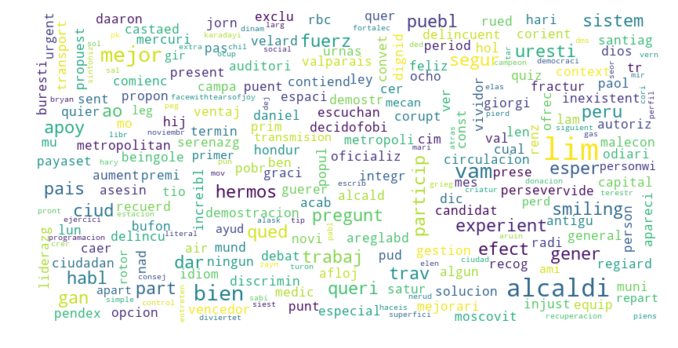

In [34]:
# df_pos = df[df['label'] == 'pos']
# df_neutral = df[df['label'] == 'neutral']
# df_neg = df[df['label'] == 'neg']

generate_cloudword(df_result)
#generate_cloudword(df_neutral)
#generate_cloudword(df_neg)

### Split Training Dataset

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# df = shuffle(df)

X, y = df_result['sample_value'], df_result['sample_float_sentiment']

vect = TfidfVectorizer(use_idf=True, smooth_idf=False)

# classes = df.label.unique()
# print(classes)

X_train, y_train = X, y


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=777)

### Entrenamiento

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import numpy as np



alg = MultinomialNB()
alg = LinearSVC()
#alg = ElasticNet()
#alg = Perceptron(n_jobs=-1, class_weight='balanced')
#alg = LogisticRegression()
alg = LinearRegression(copy_X=True, fit_intercept=True)

pipe = Pipeline([('vec', vect), ("clf", alg)])
print('Run Logistic')

#{'clf__fit_intercept': True, 
# 'clf__normalize': True, 
# 'vec__analyzer': 'word',
# 'vec__binary': True, 'vec__max_df': 0.9, 'vec__ngram_range': (1, 2), 
#'vec__norm': 'l2', 'vec__smooth_idf': False, 'vec__use_idf': True}

param_grid = dict(
    #clf__C=[1, .5, 1e3],
    clf__fit_intercept=[True],
    clf__normalize=[True],
    #clf__gamma=[.1, .05],
    # clf__dual=[True],    
    
    #clf__n_estimators=[50],
    #clf__penalty=['l2'],
    # clf__alpha=[.1, .01],
    # clf__fit_prior=[False, True],
    
    vec__ngram_range=[(1, 2), (1, 3)],
    vec__analyzer=['word'],
    vec__max_df=[.9, .87, 0.6],
    vec__norm=['l2'],
    vec__binary=[True, False],
    vec__use_idf=[True],
    vec__smooth_idf=[False]    
)

shuffle_kfold = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=shuffle_kfold, verbose=5, n_jobs=24, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Run Logistic
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_i

[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.87, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.3182099972279565, total=   8.8s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.6, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.2944983396998162, total=   8.2s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.6, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False

[Parallel(n_jobs=24)]: Done  26 out of  60 | elapsed:   22.6s remaining:   29.5s


[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.296663097263527, total=   9.2s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.6, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.2927193730505516, total=   9.1s
[CV] clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.6, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True 
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=Fals

[Parallel(n_jobs=24)]: Done  39 out of  60 | elapsed:   30.0s remaining:   16.1s


[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.87, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.32015944824134, total=  10.5s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.30615573250518635, total=  15.2s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.6, vec__ngram_range=(1, 3), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.3048805334725533, total=  17.1s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.9, vec__ngram_range=(1, 3), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.2877062729615778, total=  14.5s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=F

[Parallel(n_jobs=24)]: Done  52 out of  60 | elapsed:   33.7s remaining:    5.2s


[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.87, vec__ngram_range=(1, 3), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.31768717847864303, total=  11.3s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.6, vec__ngram_range=(1, 2), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.32353199849883285, total=   6.0s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.87, vec__ngram_range=(1, 3), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.2877062729615778, total=  11.8s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__binary=False, vec__max_df=0.6, vec__ngram_range=(1, 3), vec__norm=l2, vec__smooth_idf=False, vec__use_idf=True, score=0.30615573250518635, total=   6.6s
[CV]  clf__fit_intercept=True, clf__normalize=True, vec__analyzer=word, vec__bi

[Parallel(n_jobs=24)]: Done  60 out of  60 | elapsed:   36.6s finished


{'clf__fit_intercept': True, 'clf__normalize': True, 'vec__analyzer': 'word', 'vec__binary': True, 'vec__max_df': 0.9, 'vec__ngram_range': (1, 2), 'vec__norm': 'l2', 'vec__smooth_idf': False, 'vec__use_idf': True}
0.3085462174444647


## Generate Binary Model

In [41]:
from core import Jiazz as J


J.compress(grid_search, 'sentiment_esp_float')

'sentiment_esp_float'

### Test Binary Model

In [47]:
from core import Jiazz as J


alg = J.load('sentiment_esp_float')

text = "@renzo_reggiardo @renzo_reggiardo por qué meter a un farandulero a su campaña política? me parecía un hombre que podía cambiar lima ... un voto menos 👎🏼 que bad"
print(J.score(alg, text))

text = "en dias como estos me gustaria morir"
print(J.score(alg, text))

text = "solo quiero agradecerles a todos por su esfuerzo"
print(J.score(alg, text))

text = "... un voto menos 👎🏼 que bad"
print(J.score(alg, text))


{'tag': -0.4000000013049815, 'scores': {}}
{'tag': -0.1516954494342537, 'scores': {}}
{'tag': 0.8876459900230412, 'scores': {}}
{'tag': -0.20118750838353758, 'scores': {}}


In [12]:
# =IF(B2<0,RANDBETWEEN(-99, -65)/100,IF(B2=0,RANDBETWEEN(0, 15)/100,IF(B2>0,RANDBETWEEN(65, 99)/100,1)))